In [1]:
from preprocessing import *
from training import *
from shap_explainer import *
from pathlib import Path

c:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
stations = ["FDMO", "MC2", "MMO1", "NRCA", "T1212", "T1213", "T1214", "T1216", "T1244"]

In [ ]:
pre = Preprocessing(
        n_samples=1300,
        fs=100,
        nperseg=64,
        noverlap_ratio=0.8,
        normalization=True,
        train_frac=0.8,
        force_balance=True,
        seed=42,
        cut_freq=None,
        eps=1e-10,
        verbose=True
    )

In [ ]:
pre.make_dset(
    input_dir = "dset",
    output_dir = "preprocessed_dset"
    )

In [ ]:
trainer = Training(
    batch_size=32,
    max_epochs=30,
    patience=5
)

In [ ]:
trainer.train_one_model_multi_stations(
    input_dir="preprocessed_dset",
    output_dir="trained_models",
    stations=stations,
    save_models=True,
    save_results=True
)

In [ ]:
trainer.train(
    input_dir="preprocessed_dset",
    output_dir="trained_models_multimodels",
    save_models=True,
    save_results=True
)

In [4]:
expl = SHAPExplainer(verbose=True)

[SHAPExplainer]
  project_root   : C:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI
  pre_root       : C:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\preprocessed_dset
  models_root    : C:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\trained_models\models
  device         : cpu
  modern_shap?   : True


In [ ]:
for st in stations:
    correct_dir = expl.generate_correct_samples_multi(
        station=st,
        model_paths=[
            f"trained_models_multimodels/models/{st}/best.ckpt",
            r"trained_models\models\MODEL_FDMO_MC2_MMO1_NRCA_T1212_T1213_T1214_T1216_T1244\best.ckpt",
        ],
        overwrite=True,
        output_path="correctly_predicted_samples",
    )

In [ ]:
for st in stations:
    expl.cap_correct_samples(
        station=st,
        input_path=f"correctly_predicted_samples",
        max_per_class=100,
    )

In [ ]:
for st in stations:
    expl.compute_shap_on_correct_samples(
        station=st,
        shap_model_path=f"trained_models_multimodels/models/{st}/best.ckpt",  # explain the singular model
        input_path="correctly_predicted_samples",                         # reads common-correct pngs
        output_path="shap_values_multimodel",                     # writes shap tensors
        max_evals=5000,
        overwrite=False,
    )

    expl.compute_means_from_shap_output(
        station=st,
        input_path="shap_values_multimodel",
    )

[FDMO] SHAP | foreshock: n=100 -> shap_values_multimodel\FDMO\foreshock\foreshock


PartitionExplainer explainer: 2it [00:14, 14.13s/it]               
PartitionExplainer explainer: 2it [00:10, 10.72s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.66s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.57s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.53s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.74s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.66s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.38s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.41s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.58s/it]               ]
PartitionExplainer explainer: 2it [00:10, 10.55s/it]               t]
FDMO SHAP foreshock:  11%|█         | 11/100 [02:18<18:43, 12.63s/it]


KeyboardInterrupt: 

In [ ]:
for st in stations:
    expl.compute_shap_on_correct_samples(
        station=st,
        shap_model_path=r"trained_models\models\MODEL_FDMO_MC2_MMO1_NRCA_T1212_T1213_T1214_T1216_T1244\best.ckpt",  # explain the singular model
        input_path="correctly_predicted_samples",                         # reads common-correct pngs
        output_path="shap_values_singlemodel",                     # writes shap tensors
        max_evals=5000,
        overwrite=False,
    )

    expl.compute_means_from_shap_output(
        station=st,
        input_path="shap_values_singlemodel",
    )

c:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\shap_explainer.py:829: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=top)


[OK] figure saved to: C:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\figures\grid_mean_shap_multimodels.png


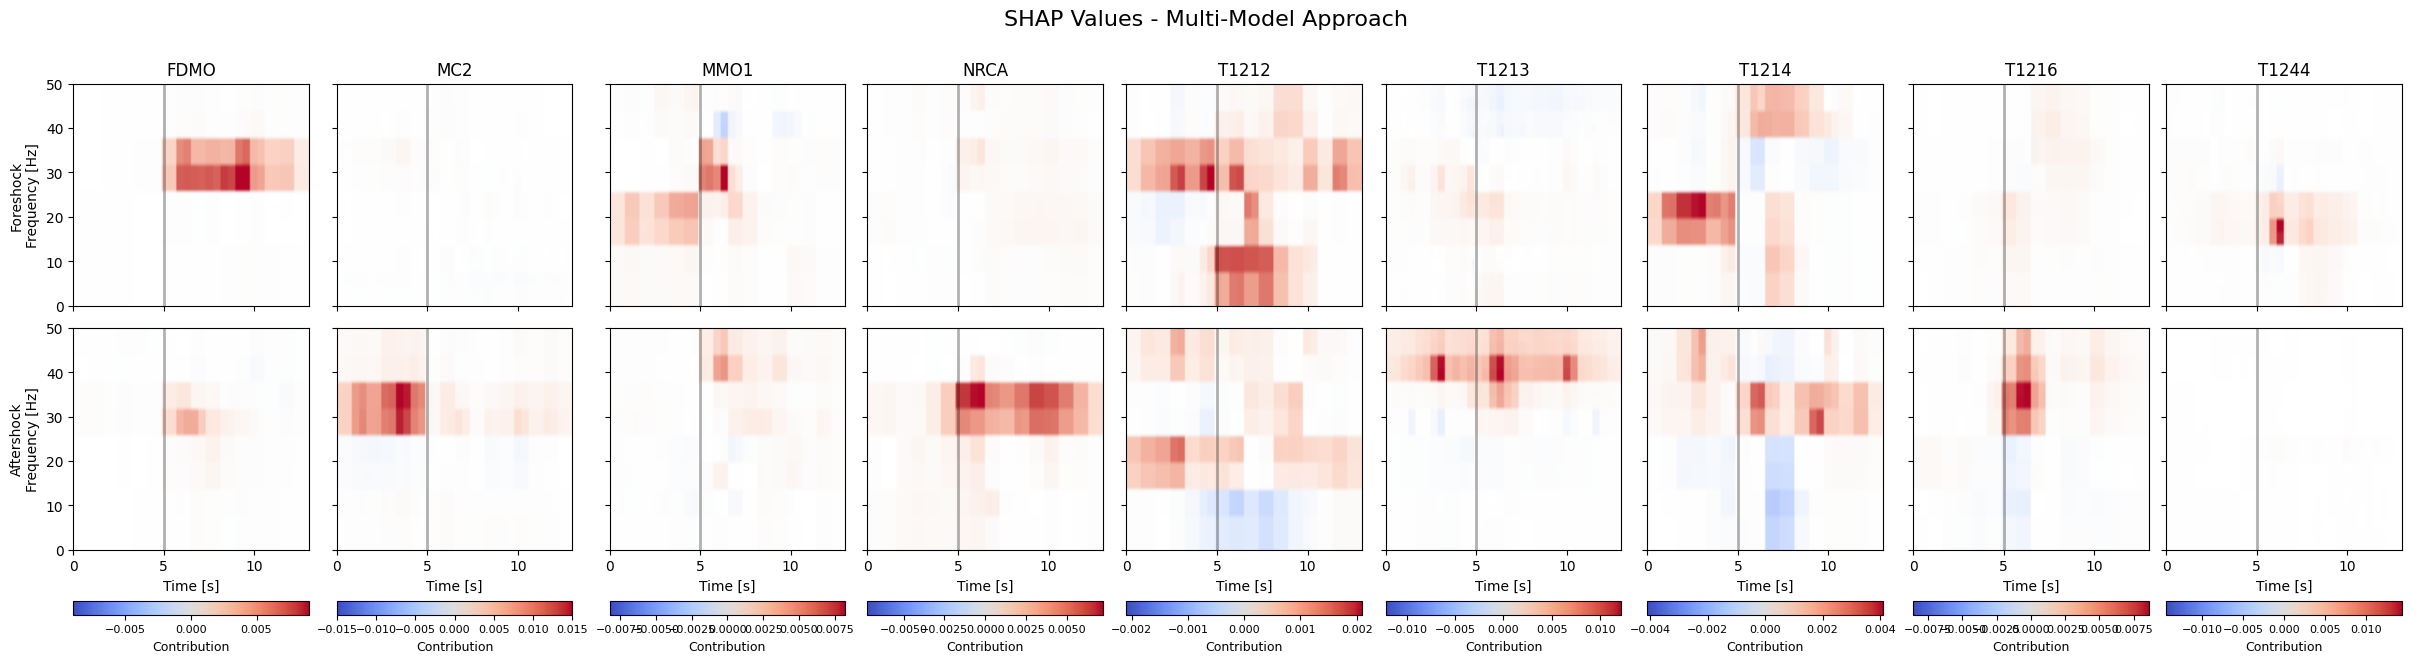

In [12]:
expl.plot_grid_mean_shap_new(
    root="shap_values_multimodel",
    stations=stations,
    ft=((0, 50), (0, 13)),
    save_path="figures/grid_mean_shap_multimodels.png",
    dpi=300,
    plot_title="SHAP Values - Multi-Model Approach"
)


c:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\shap_explainer.py:829: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=top)


[OK] figure saved to: C:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\figures\grid_mean_shap_singlemodel.png


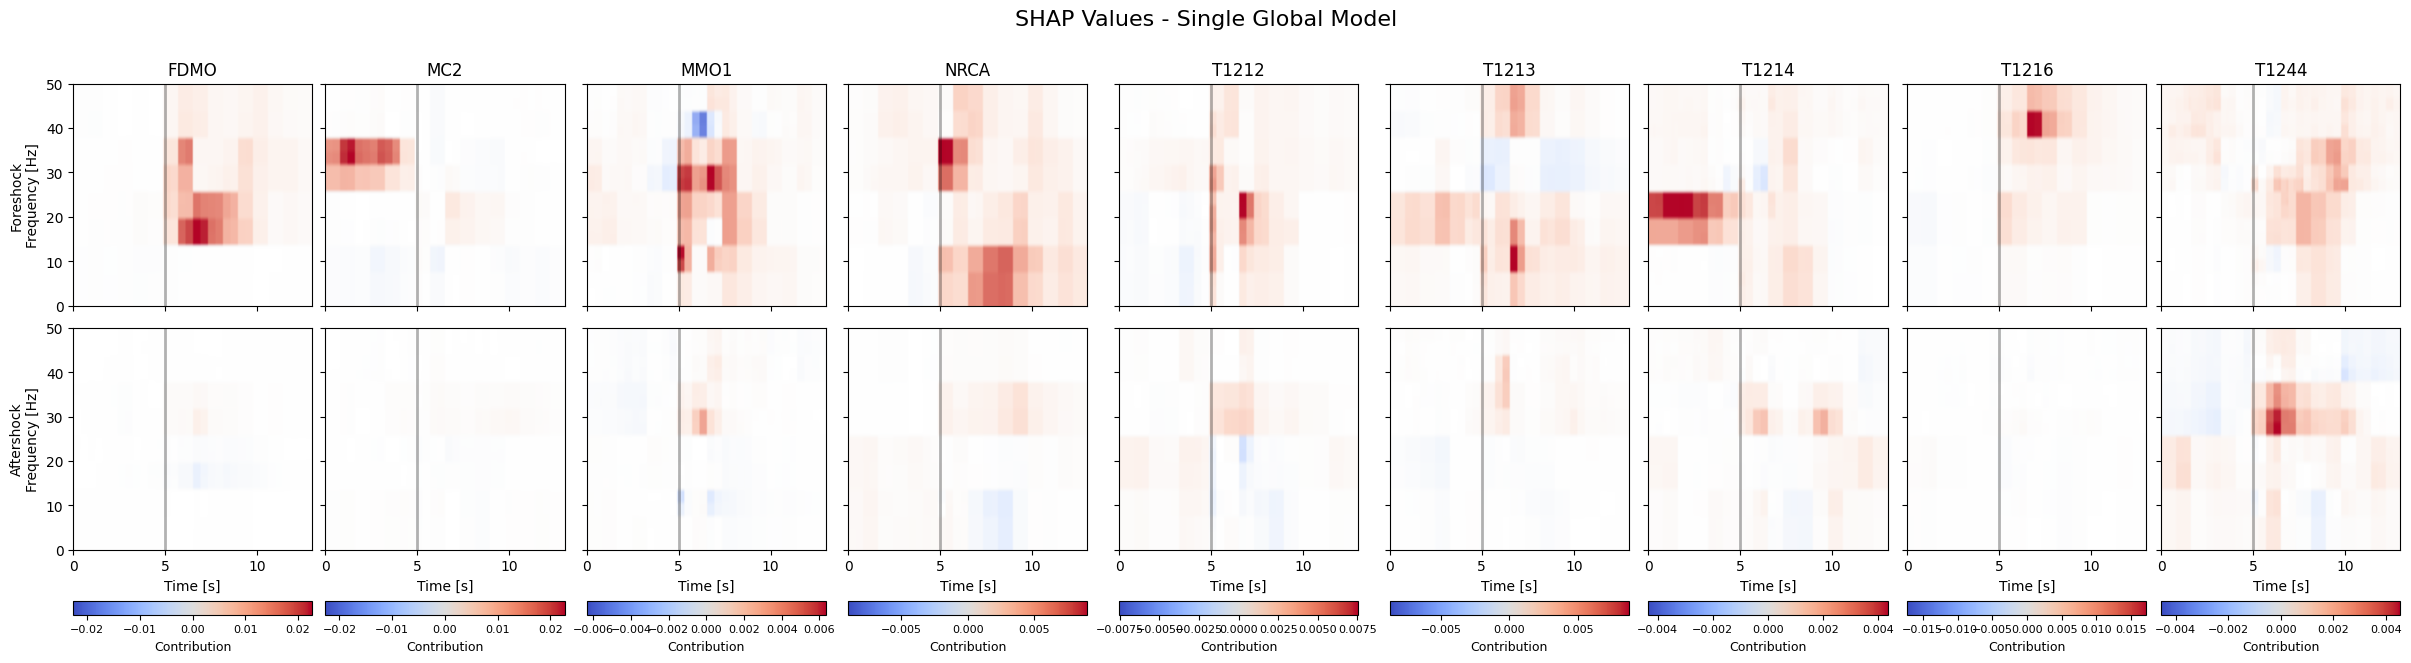

In [11]:
expl.plot_grid_mean_shap_new(
    root="shap_values_singlemodel",
    stations=stations,
    ft=((0, 50), (0, 13)),
    save_path="figures/grid_mean_shap_singlemodel.png",
    dpi=300,
    plot_title="SHAP Values - Single Global Model"
)


c:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\shap_explainer.py:829: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=top)


[OK] figure saved to: C:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\figures\grid_mean_shap_singlemodel_normalized.png


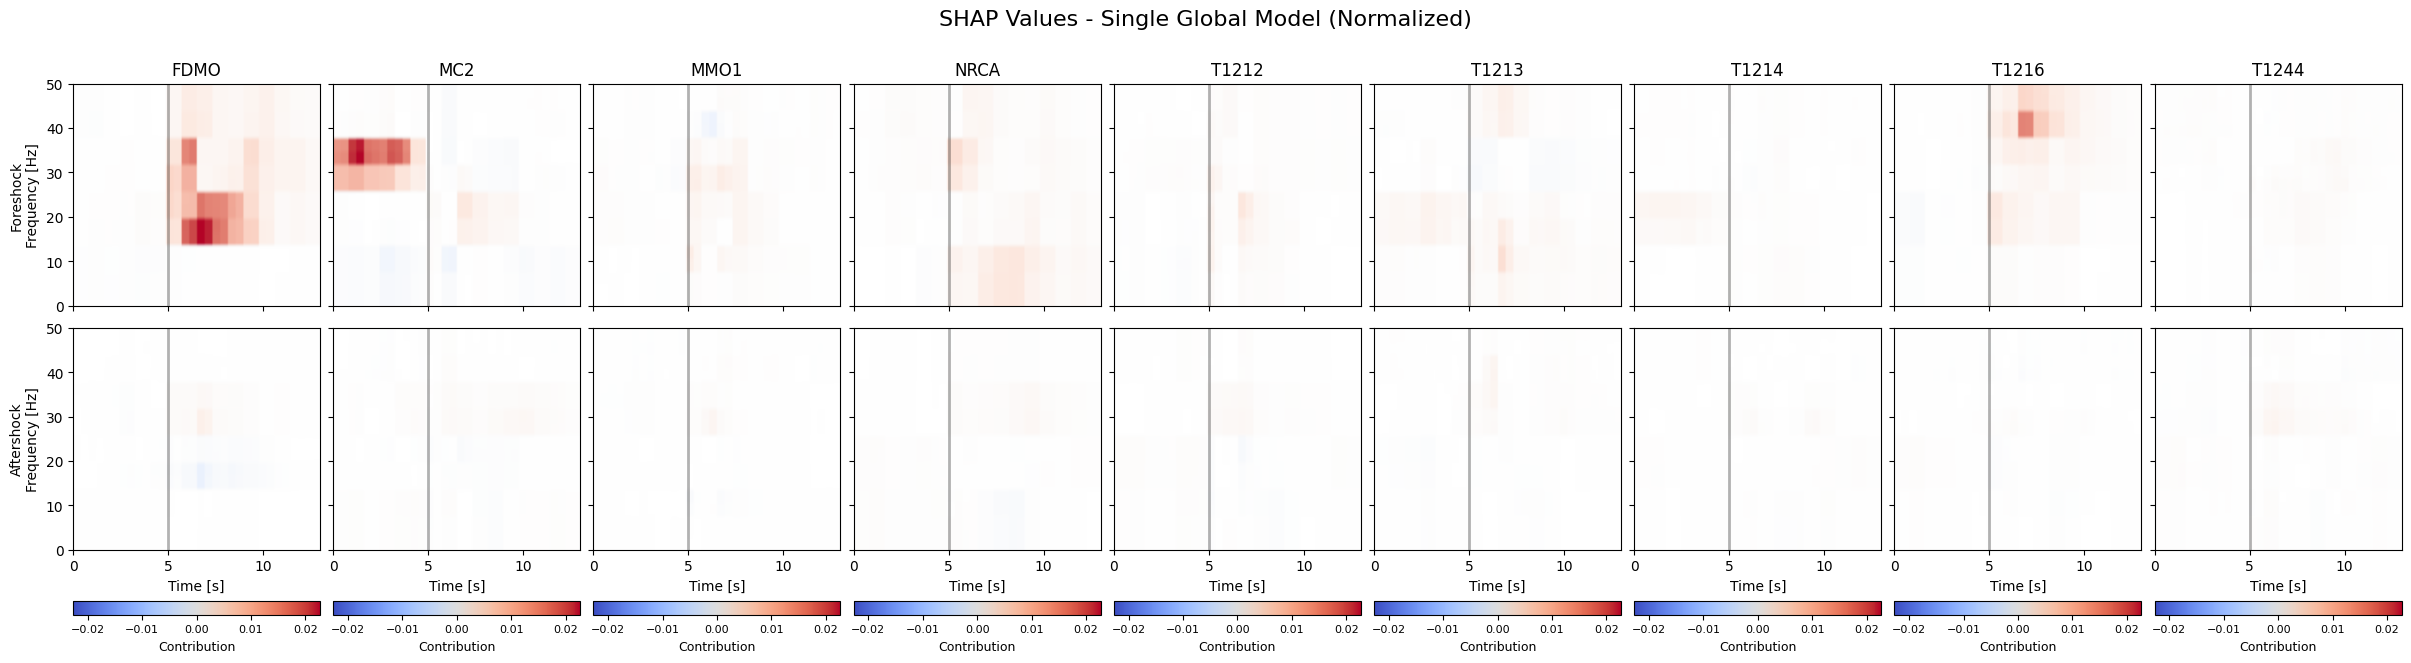

In [10]:
expl.plot_grid_mean_shap_new(
    root="shap_values_singlemodel",
    stations=stations,
    ft=((0, 50), (0, 13)),
    save_path="figures/grid_mean_shap_singlemodel_normalized.png",
    dpi=300,
    plot_title="SHAP Values - Single Global Model (Normalized)",
    normalize_all=True
)


c:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\shap_explainer.py:829: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=top)


[OK] figure saved to: C:\Users\frmar\OneDrive\Desktop\GitHub\SeismoXAI\figures\grid_mean_shap_multimodels_normalized.png


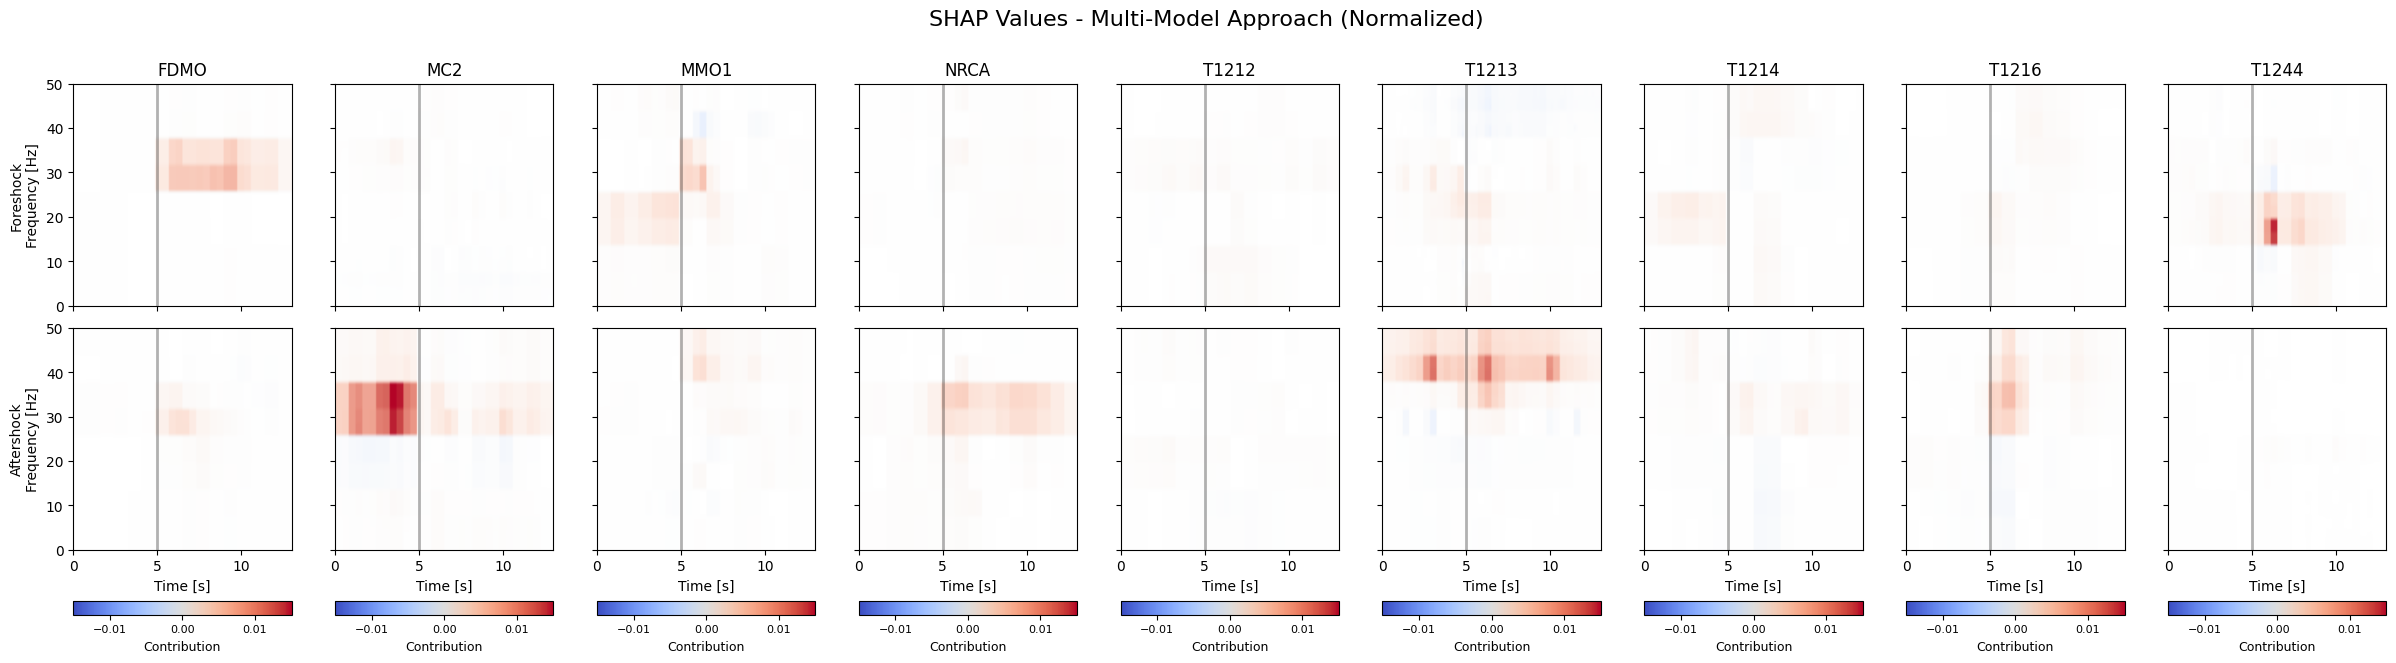

In [9]:
expl.plot_grid_mean_shap_new(
    root="shap_values_multimodel",
    stations=stations,
    ft=((0, 50), (0, 13)),
    save_path="figures/grid_mean_shap_multimodels_normalized.png",
    dpi=300,
    plot_title="SHAP Values - Multi-Model Approach (Normalized)",
    normalize_all=True
)
